In [1]:
import h5py
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
with h5py.File("U_matrix", "r") as file:
    U = file["matrix"][:]
    
with h5py.File("V_matrix", "r") as file:
    V = file["matrix"][:]

with h5py.File("M_matrix", "r") as file:
    M = file["matrix"][:]
    
with h5py.File("xgrid_matrix", "r") as file:
    xgrid = file["matrix"][:]
    
with h5py.File("ygrid_matrix", "r") as file:
    ygrid = file["matrix"][:]

# Mean velocity development
absolut mean velocity over number of "cells"

In [4]:
total_t = np.shape(M)[0] 
mean_M = np.zeros(total_t) # The sum of absolut velocity/the number of "cells" (IA)
std_M = np.zeros(total_t)

for t in range(total_t):
    mean_M[t] = np.mean(M[t])
    std_M[t] = np.std(M[t])

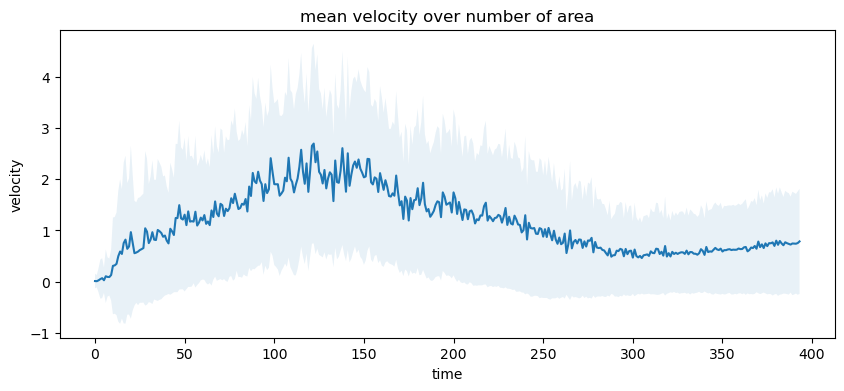

In [5]:
plt.figure(figsize=(10,4))
plt.title("mean velocity over number of area")
# Mean over cell/IA number.
plt.plot(range(total_t), mean_M)
plt.fill_between(range(total_t), mean_M-std_M, mean_M+std_M, alpha=0.1)
plt.xlabel("time")
plt.ylabel("velocity")
#plt.savefig("mean_vel_IA", dpi=300)
plt.show()

In [6]:
np.argmax(mean_M) # The time point of the maximal mean velocity of cells.

122

In [7]:
part_mean = mean_M[291:391]
part_std = std_M[291:391]
part_time = range(total_t)[291:391]

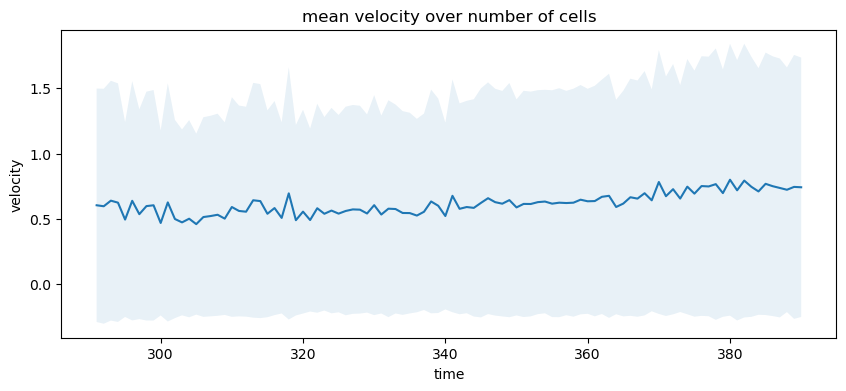

In [8]:
plt.figure(figsize=(10,4))
plt.title("mean velocity over number of cells")
# Mean over cell/IA number.
plt.plot(part_time, part_mean)
plt.fill_between(part_time, part_mean-part_std, part_mean+part_std, alpha=0.1)
plt.xlabel("time")
plt.ylabel("velocity")
#plt.savefig("mean_vel_IA_part", dpi=300)
plt.show()

Mean velocity over the area size -- does this make sense at all?! 
how to consider the IA --> with expansion or not?

In [9]:
size = 1024

area_mean_M = np.zeros(total_t)
for i in range(total_t):
    area_mean_M[t] = np.sum(M[t])/size

In [10]:
"""
plt.figure(figsize=(10,4))
plt.title("mean velocity over observation area")
# Mean over area.
plt.plot(range(total_t), area_mean_M)
plt.fill_between(range(total_t), mean_M-std_M, mean_M+std_M, alpha=0.1)
plt.xlabel("time")
plt.ylabel("velocity")
plt.savefig("mean_vel_area", dpi=300)
plt.show()
"""

'\nplt.figure(figsize=(10,4))\nplt.title("mean velocity over observation area")\n# Mean over area.\nplt.plot(range(total_t), area_mean_M)\nplt.fill_between(range(total_t), mean_M-std_M, mean_M+std_M, alpha=0.1)\nplt.xlabel("time")\nplt.ylabel("velocity")\nplt.savefig("mean_vel_area", dpi=300)\nplt.show()\n'

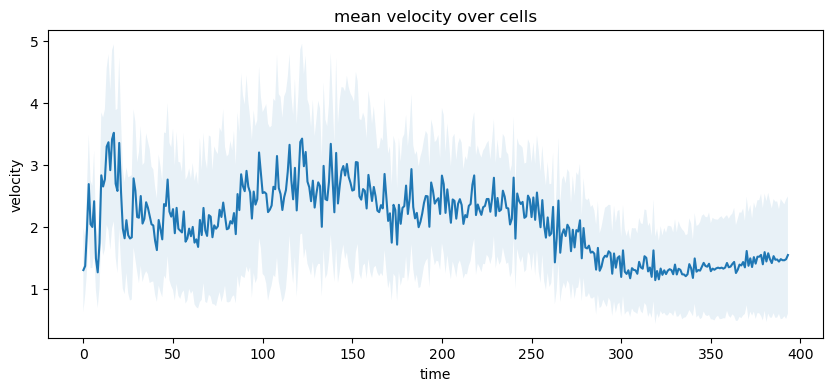

In [66]:
total_t = np.shape(M)[0]
mean_cell_M = np.zeros(total_t)
std_M = np.zeros(total_t)
std_M_g = np.zeros(total_t)
area_per = np.zeros(total_t)

for t in range(total_t):
    mean_cell_M[t] = np.sum(M[t])/np.count_nonzero(M[t])
    std_M[t] = np.std(M[t][np.nonzero(M[t])])
    std_M_g[t] = np.std(M[t])
    area_per[t] = np.count_nonzero(M[t])/np.size(M[t])

plt.figure(figsize=(10,4))
plt.title("mean velocity over cells")
# Mean over cell/IA number.
plt.plot(range(total_t), mean_cell_M)
plt.fill_between(range(total_t), mean_cell_M-std_M, mean_cell_M+std_M, alpha=0.1)
plt.xlabel("time")
plt.ylabel("velocity")
#plt.savefig("mean_vel_IA", dpi=300)
plt.show()

# Different representations of the arrows

## The original figure

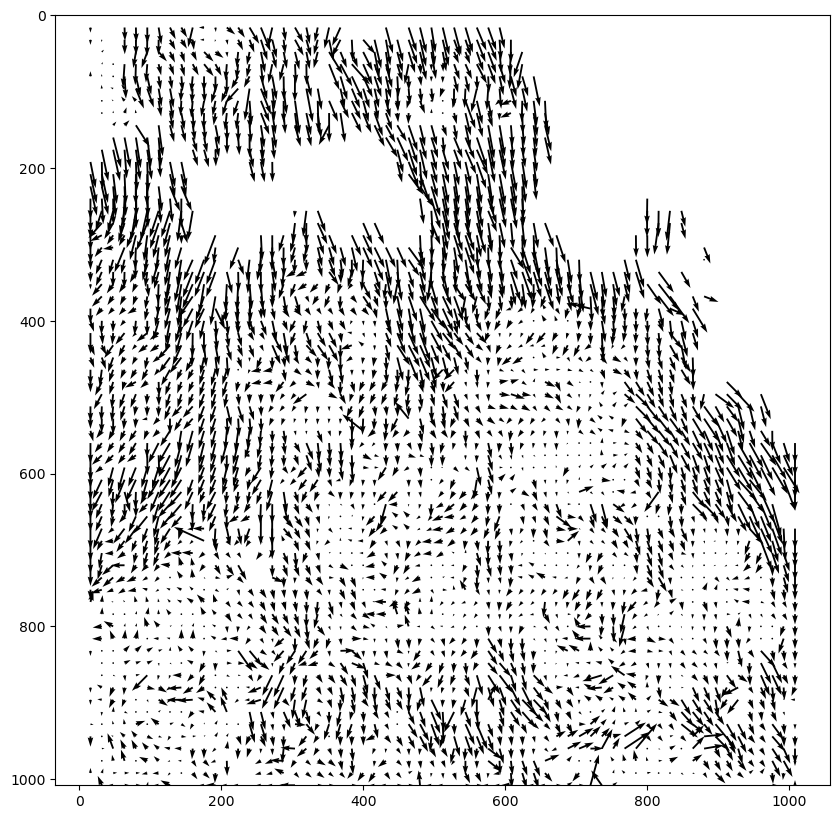

In [11]:
t = 150

plt.figure(figsize=(10, 10))
plt.quiver(xgrid[t], ygrid[t], V[t], -U[t], scale=150)
plt.ylim(max(ygrid[t][1]), 0)
plt.show()

## Coloring the arrows depending on the directions

In [12]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize

Attention: the colormap will be considered as circular. The beginning and the end of the color map will be connected to each other --> the arrows that point up have color of the both ends of the colormap while the arrows that point down have color in the middle of the colormap.

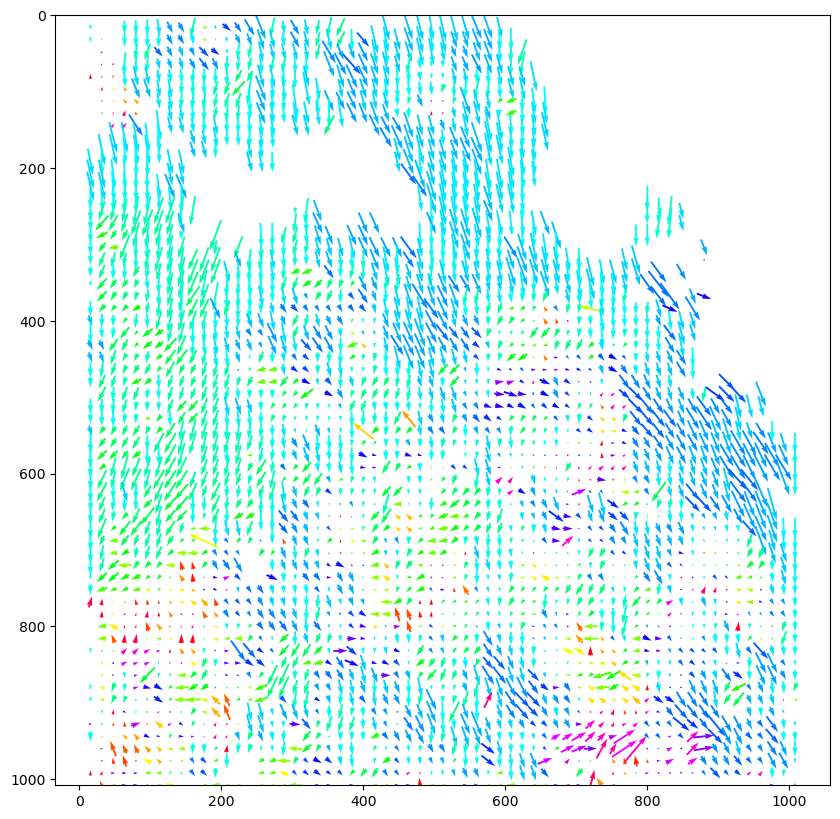

In [61]:
x = xgrid[t]
y = ygrid[t]
u = U[t]
v = V[t]
colors = np.arctan2(v, u)

norm = Normalize()
norm.autoscale(colors)
# we need to normalize our colors array to match it colormap domain
# which is [0, 1]

colormap = cm.inferno
# pick your colormap here, refer to 
# http://matplotlib.org/examples/color/colormaps_reference.html
# and
# http://matplotlib.org/users/colormaps.html
# for details
plt.figure(figsize=(10, 10))
plt.ylim(max(ygrid[t][1]), 0)
plt.quiver(x, y, v, -u, np.arctan2(v, u), pivot="mid",
        scale=150, cmap='hsv')
#plt.savefig("color_hsv", dpi=300)
# Blue colors are pointed down. Red colors are pointed up.

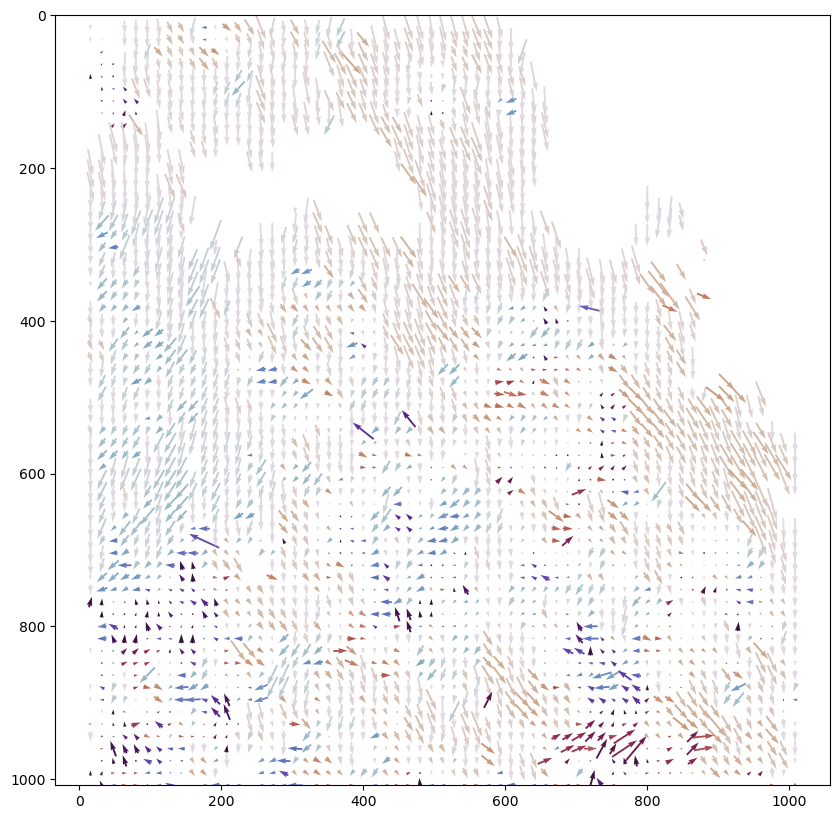

In [14]:
plt.figure(figsize=(10, 10))
plt.ylim(max(ygrid[t][1]), 0)
plt.quiver(x, y, v, -u, np.arctan2(v, u), pivot="mid",
        scale=150, cmap='twilight_shifted')
#plt.savefig("color_twilight_shifted", dpi=300)
# Emphesize the cells that go up.

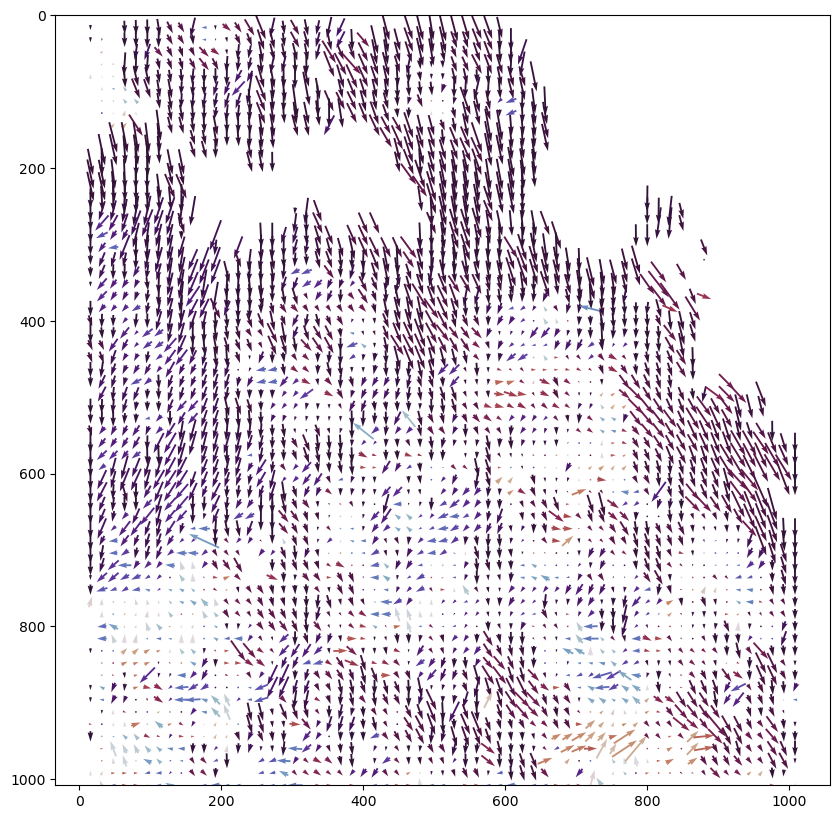

In [15]:
plt.figure(figsize=(10, 10))
plt.ylim(max(ygrid[t][1]), 0)
plt.quiver(x, y, v, -u, np.arctan2(v, u), pivot="mid",
        scale=150, cmap='twilight')
#plt.savefig("color_twilight", dpi=300)
# Emphasize the cells are flow down.

In [34]:
np.arctan2(v, u)*90 /np.pi

array([[  0.       ,   0.       ,         nan, ...,         nan,
         90.       ,         nan],
       [        nan,  -4.8716617,  67.708015 , ...,  63.229336 ,
         80.6205   , -78.172554 ],
       [        nan,         nan,         nan, ..., -84.52465  ,
         47.591396 , -45.       ],
       ...,
       [        nan,         nan,         nan, ...,  13.7030115,
          2.1313772,  45.       ],
       [        nan,         nan,         nan, ...,  14.424144 ,
         -3.2241142,         nan],
       [        nan,         nan,         nan, ...,   0.       ,
                nan,  90.       ]], dtype=float32)

In [43]:
import numpy as np
 
arr1 = [-1, +1, +1, -1, 0, -1, 0]
arr2 = [-1, -1, +1, +1, 1, 0, 0]
 
ans = np.arctan2(arr2, arr1) * 180/ np.pi
 
print ("x-coordinates : ", arr1)
print ("y-coordinates : ", arr2)

print(np.arctan2(arr2, arr1))
print ("\narctan2 values : \n", ans)

x-coordinates :  [-1, 1, 1, -1, 0, -1, 0]
y-coordinates :  [-1, -1, 1, 1, 1, 0, 0]
[-2.35619449 -0.78539816  0.78539816  2.35619449  1.57079633  3.14159265
  0.        ]

arctan2 values : 
 [-135.  -45.   45.  135.   90.  180.    0.]


Create own color map...

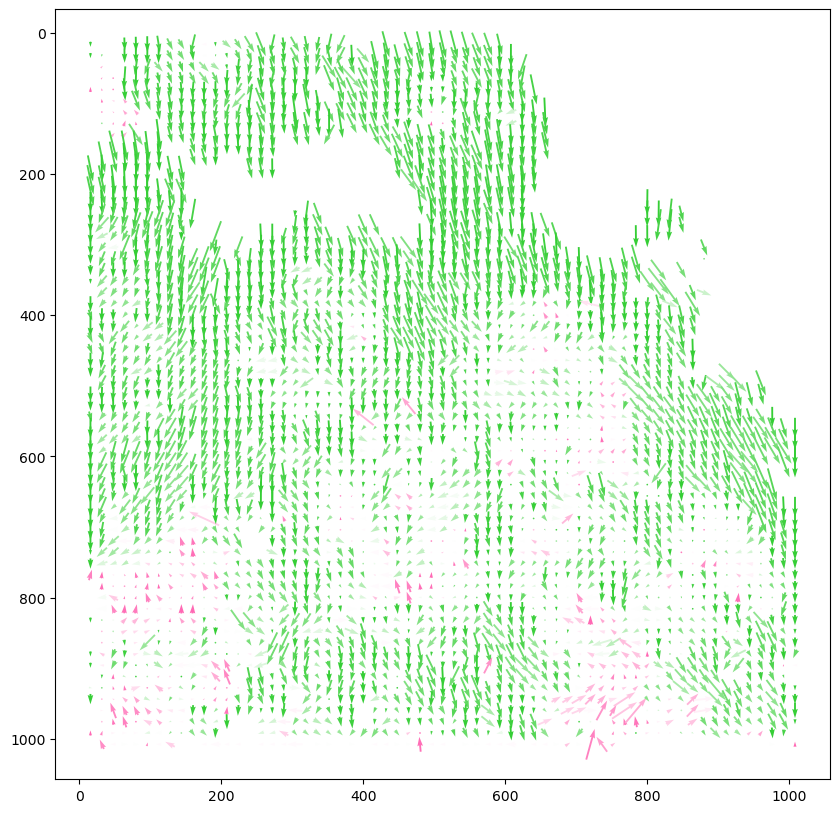

In [64]:
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap

colors = ["hotpink", "white", "limegreen", "white", "hotpink"]
n_bins = 100
cmap_name = 'direction_color'
self_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bin)

plt.figure(figsize=(10, 10))
plt.gca().invert_yaxis()
plt.quiver(x, y, v, -u, np.arctan2(v, u), pivot="mid",
        scale=150, cmap=self_cmap)
plt.savefig("self_map_direction", dpi=300)

## Coloring the arrows depending on the magnitude

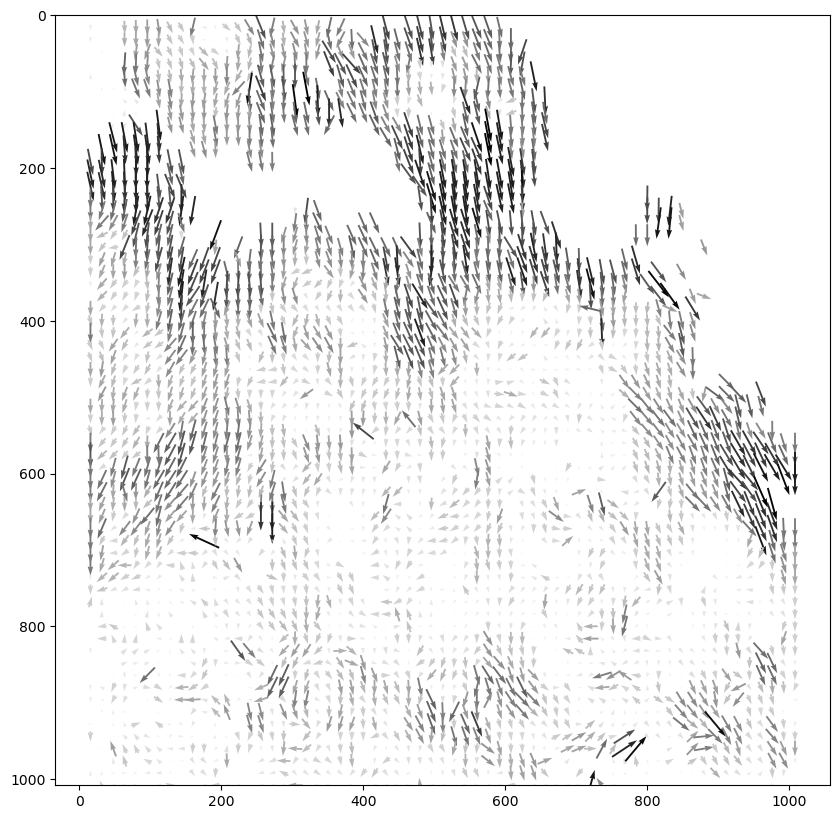

In [16]:
plt.figure(figsize=(10, 10))
plt.ylim(max(ygrid[t][1]), 0)
plt.quiver(x, y, v, -u, M[t], pivot="mid",
        scale=150, cmap='Greys')
#plt.savefig("magnitude_grey", dpi=300)

## Contour plot depending on the magnitude

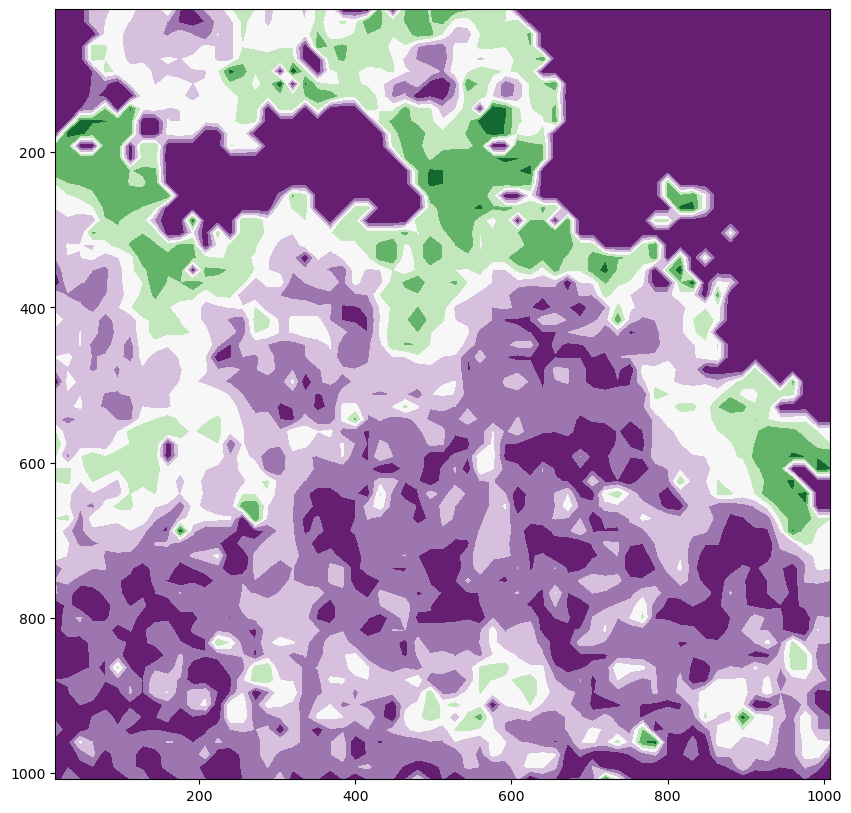

In [17]:
plt.figure(figsize=(10, 10))
plt.gca().invert_yaxis()
plt.contourf(xgrid[t], ygrid[t], M[t], cmap="PRGn")
#plt.savefig("magnitude_contour_PRGn", dpi=300)

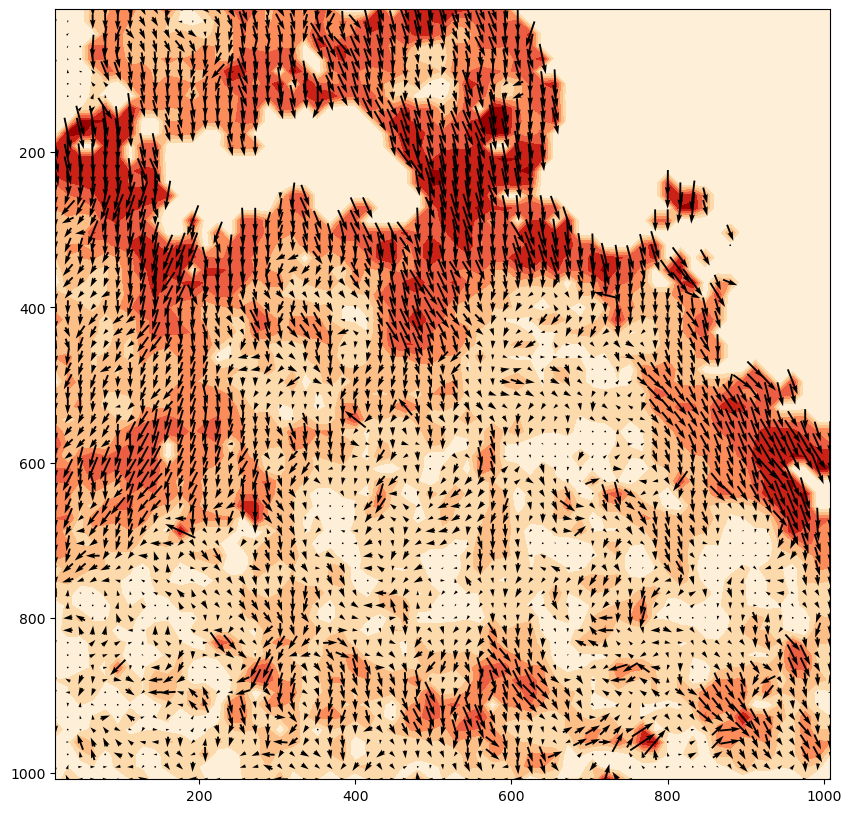

In [18]:
plt.figure(figsize=(10, 10))
plt.gca().invert_yaxis()
plt.contourf(xgrid[t], ygrid[t], M[t], cmap="OrRd")
plt.quiver(xgrid[t], ygrid[t], V[t], -U[t], 
           pivot="mid",scale=150)
#plt.savefig("magnitude_contour_OrRd_witharrow", dpi=300)

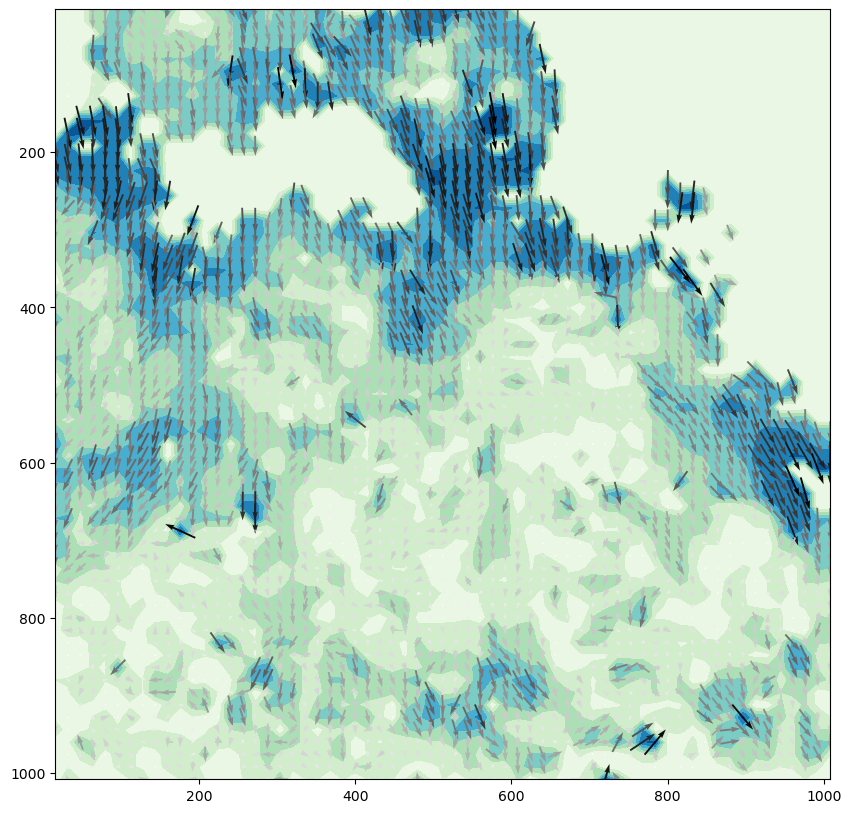

In [22]:
plt.figure(figsize=(10, 10))
plt.gca().invert_yaxis()
plt.contourf(xgrid[t], ygrid[t], M[t], cmap="GnBu")
plt.quiver(x, y, v, -u, M[t], pivot="mid", scale=150, cmap='Greys')
plt.savefig("magnitude_contour_GnBu_witharrow", dpi=300)

## Coloring depending on divergence